In [56]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [58]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [76]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [60]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [62]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [64]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | grand-lahou
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | ulaangom
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | mitchell
Processing Record 16 of Set 1 | urumqi
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | esperance
Process

Processing Record 38 of Set 4 | sarkand
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | gizo
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | nioro
Processing Record 43 of Set 4 | chachoengsao
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | cheyenne
Processing Record 46 of Set 4 | vilhena
Processing Record 47 of Set 4 | santa maria
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | salihorsk
Processing Record 50 of Set 4 | karakol
Processing Record 1 of Set 5 | rungata
City not found. Skipping...
Processing Record 2 of Set 5 | porlamar
Processing Record 3 of Set 5 | bilibino
Processing Record 4 of Set 5 | panama city
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | toliary
City not found. Skipping...
Processing Record 7 of Set 5 | porangatu
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 

Processing Record 27 of Set 8 | billings
Processing Record 28 of Set 8 | la malbaie
Processing Record 29 of Set 8 | presidencia roque saenz pena
Processing Record 30 of Set 8 | valdivia
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | kulhudhuffushi
Processing Record 33 of Set 8 | tagusao
Processing Record 34 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 35 of Set 8 | hingoli
Processing Record 36 of Set 8 | hermiston
Processing Record 37 of Set 8 | charlestown
Processing Record 38 of Set 8 | kiruna
Processing Record 39 of Set 8 | narsaq
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | bani
Processing Record 42 of Set 8 | odda
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | sorvag
City not found. Skipping...
Processing Record 46 of Set 8 | kanigiri
Processing Record 47 of Set 8 | labuan
Processing Record 48 of Set 8 | kelamangalam
Processing Record 49 of Se

Processing Record 14 of Set 12 | alofi
Processing Record 15 of Set 12 | abiy adi
City not found. Skipping...
Processing Record 16 of Set 12 | haines junction
Processing Record 17 of Set 12 | villanueva de la serena
Processing Record 18 of Set 12 | anqiu
Processing Record 19 of Set 12 | yarega
Processing Record 20 of Set 12 | maneadero
Processing Record 21 of Set 12 | santa rosalia
Processing Record 22 of Set 12 | tigil
Processing Record 23 of Set 12 | hoopstad
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | ostashkov
Processing Record 26 of Set 12 | tabou
Processing Record 27 of Set 12 | zurrieq
Processing Record 28 of Set 12 | cabedelo
Processing Record 29 of Set 12 | tommot
Processing Record 30 of Set 12 | afsin
Processing Record 31 of Set 12 | khandyga
Processing Record 32 of Set 12 | naryan-mar
Processing Record 33 of Set 12 | bokoro
Processing Record 34 of Set 12 | mporokoso
Processing Record 35 of Set 12 | locri
Processing Record 36 of Set 12 | dor

In [65]:
len(city_data)

560

In [66]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,32.11,75,75,23.58,CL,2021-05-25 05:14:13
1,Bambous Virieux,-20.3428,57.7575,78.22,68,55,10.45,MU,2021-05-25 05:14:14
2,Busselton,-33.6500,115.3333,63.05,52,99,2.17,AU,2021-05-25 05:14:14
3,Yellowknife,62.4560,-114.3525,32.56,54,0,3.00,CA,2021-05-25 05:11:36
4,Bethel,41.3712,-73.4140,58.35,67,90,3.44,US,2021-05-25 05:14:14
5,Kaitangata,-46.2817,169.8464,42.93,75,0,3.27,NZ,2021-05-25 05:14:14
6,Grand-Lahou,5.1367,-5.0242,79.86,88,72,8.16,CI,2021-05-25 05:14:15
7,Kapaa,22.0752,-159.3190,80.58,74,40,2.71,US,2021-05-25 05:10:39
8,Saint George,37.1041,-113.5841,73.26,19,1,9.22,US,2021-05-25 05:14:15
9,Hilo,19.7297,-155.0900,77.79,88,75,5.75,US,2021-05-25 05:13:34


In [67]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [68]:
city_data_df = city_data_df[new_column_order]

In [69]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-05-25 05:14:13,-53.1500,-70.9167,32.11,75,75,23.58
1,Bambous Virieux,MU,2021-05-25 05:14:14,-20.3428,57.7575,78.22,68,55,10.45
2,Busselton,AU,2021-05-25 05:14:14,-33.6500,115.3333,63.05,52,99,2.17
3,Yellowknife,CA,2021-05-25 05:11:36,62.4560,-114.3525,32.56,54,0,3.00
4,Bethel,US,2021-05-25 05:14:14,41.3712,-73.4140,58.35,67,90,3.44
5,Kaitangata,NZ,2021-05-25 05:14:14,-46.2817,169.8464,42.93,75,0,3.27
6,Grand-Lahou,CI,2021-05-25 05:14:15,5.1367,-5.0242,79.86,88,72,8.16
7,Kapaa,US,2021-05-25 05:10:39,22.0752,-159.3190,80.58,74,40,2.71
8,Saint George,US,2021-05-25 05:14:15,37.1041,-113.5841,73.26,19,1,9.22
9,Hilo,US,2021-05-25 05:13:34,19.7297,-155.0900,77.79,88,75,5.75


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

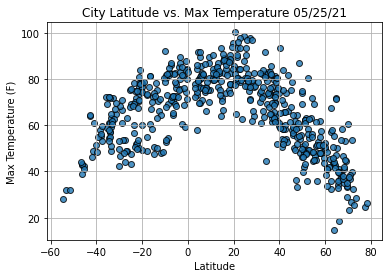

In [72]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

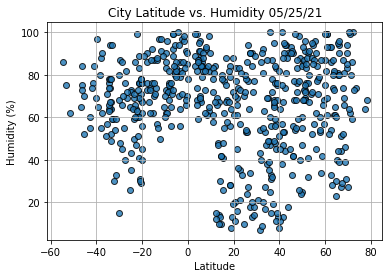

In [73]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

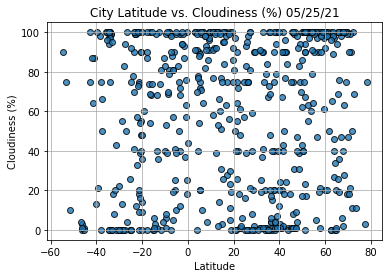

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

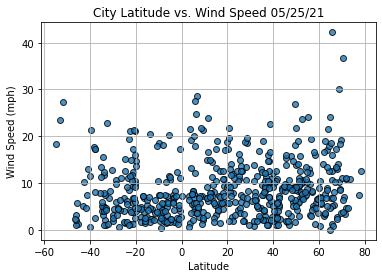

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()